# Assgn_04  » Techniques to prevent face identification

Here are two ways:
    
1. Blurring the ROI with kernel.
2. Mosaicing the ROI with zoom in and out  

So, you try both methods as Assgn_04_1 and Assgn_04_2

## 1. Assgn_04_1 Blurring on the ROI with kernel size

Drag with the mouse to blur the selected part with a blurring effect.
- After dragging the mouse, press Enter.

Please refer to the codes and output images below to fill in the blanks(codes)

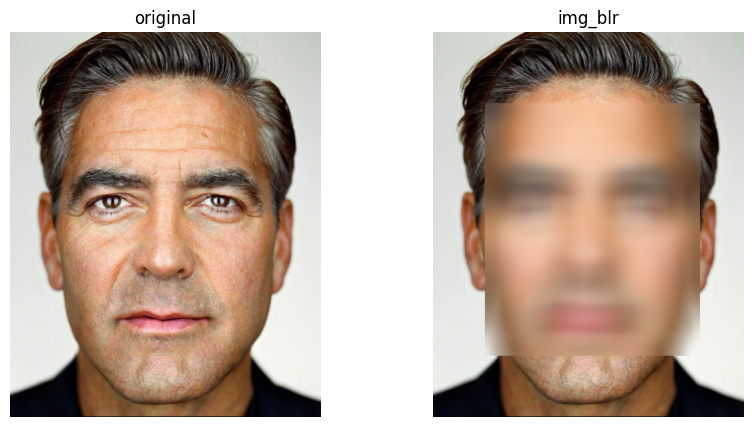

In [5]:
# Assgn_04_1_blur.py

import cv2
from matplotlib import pyplot as plt

ksize = 50              # The kernel size to use for blur handling.
win_title = 'blur'      # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img
img_org = img.copy()    # later use

while True:
    x,y,w,h =                                    # sel roi with mouse dragging
    if w > 0 and h > 0:                         # positive roi 
        roi =                                   # designate roi
        roi =                                   # blurring roi
                      = roi                     # Apply to the original image
        img_blr = img.copy()
        cv2.imshow(win_title, img)
    else:
        break
cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img_blr, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('img_blr')

plt.show()

## Answer of assgn 1 using hand-made mouse dragging function - onMouse

x = 129, y = 265, w = 509, h = 503
x = 129, y = 265, w = 509, h = 503
x = 162, y = 159, w = -341, h = -264


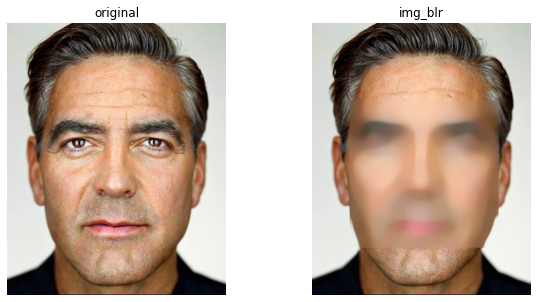

In [1]:
# Assgn_04_1_blur.py

import cv2
from matplotlib import pyplot as plt

ksize = 50              # The kernel size to use for blur handling.
win_title = 'blur'      # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img
img_org = img.copy()    # later use


#--------------------------------------------------------------
temp = []
isDragging = False 
x0, y0, w, h = -1,-1,-1,-1              # roi coord


def onMouse(event,x,y,flags,param):     # mouse event handle function  
    global isDragging, x0, y0, img      # global var
    if event == cv2.EVENT_LBUTTONDOWN:  # LBUTTONDOWN 
        isDragging = True               # and drag
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # MOUSEMOVE
        if isDragging:                  
            img_draw = img.copy()       
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # dragging area
            cv2.imshow('img', img_draw) 
    elif event == cv2.EVENT_LBUTTONUP:  # LBUTTONUP
        if isDragging:                  # drag stop
            isDragging = False          
            w = x - x0                  # dragging width
            h = y - y0                  # dragging height
            temp.append([x0, y0, w, h])

#-------------------------------------------------------------------#
while True:
    cv2.imshow('img', img)
    cv2.setMouseCallback('img', onMouse)
    cv2.waitKey()
    x,y,w,h = temp[-1]
    print(f"x = {x}, y = {y}, w = {w}, h = {h}")
    if w > 0 and h > 0:                        # positive roi 
        roi = img[y:y+h, x:x+w]                # designate roi
        roi = cv2.medianBlur(roi, ksize-1)       # blurring roi
        img[y:y+h, x:x+w] = roi                # Apply to the original image
        img_blr = img.copy()
        cv2.imshow(win_title, img)
    else:
        break
cv2.destroyAllWindows()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img_blr, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('img_blr')

plt.show()

# w and h are intendedly chosen as minus numbers to stop the while loop
# the result is for x = 129, y = 265, w = 509, h = 503

## 2. Assgn_04_2 Mosaicing the ROI with zoom in and out

After shrinking(zoom out) the image of the ROI to which the mosaic is applied by a certain percentage,   
and then zoom back in on the ROI.

- After selecting the ROI with dragging the mouse, press Enter.  

Please refer to the codes and output images below to fill in the blanks(codes)

In [5]:
# Assgn_04_2_mosaic.py
import cv2
from matplotlib import pyplot as plt


rate = 5             # Shrink ratio to use for mosaic (1/rate)
# rate = 15
# rate = 35               
win_title = 'mosaic'    # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img

while True:
    x,y,w,h =                  # Select ROI
    if w and h:
        roi =                   # designate roi
        roi =                   # 1/rate shrink 
        roi =                   # Enlarge to original size with interpolation
                     = roi      # Apply to the original image
        img5=img.copy()
#         img15=img.copy()
#         img35=img.copy()
        cv2.imshow(win_title, img)
        
    else:
        break
cv2.destroyAllWindows()

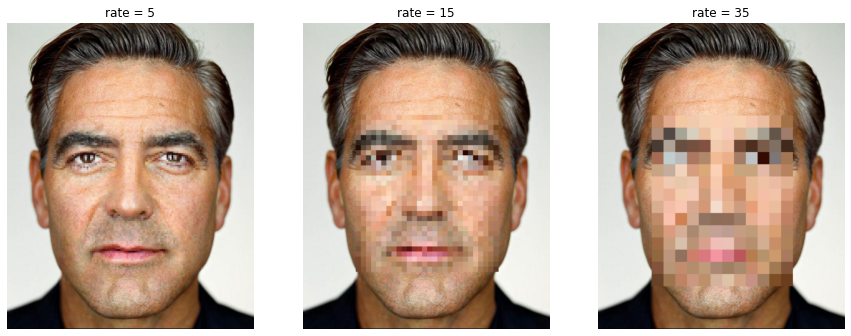

In [7]:
fig, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('rate = 5')
axs[1].imshow(cv2.cvtColor(img15, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('rate = 15')
axs[2].imshow(cv2.cvtColor(img35, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('rate = 35')

plt.show()

- Due Date : 9 Oct, 0900 a.m.  
- file name, type : yourname_assgn_04.pdf   
    
For Assgn_03 
- mail me or upload to LMS with Assgn_04 file
- due : 3 Oct. 0900 a.m

## Answer of assgn 2 using cv2.selectROI

In [1]:
# Assgn_04_2_mosaic.py

import cv2
from matplotlib import pyplot as plt

rate = 5             # Shrink ratio to use for mosaic (1/rate)
# rate = 15
# rate = 35               
win_title = 'mosaic'    # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img

while True:
    x,y,w,h = cv2.selectROI("Select ROI", img, False)         # Select ROI
    print(f"x = {x}, y = {y}, w = {w}, h = {h}")        
    if w and h:
        roi = img[y:y+h, x:x+w]         # designate roi
        roi = cv2.resize(roi, (w//rate, h//rate))                    # 1/rate shrink 
        roi = cv2.resize(roi, (w,h), interpolation=cv2.INTER_AREA)   # Enlarge to original size with interpolation
        img[y:y+h, x:x+w]= roi      # Apply to the original image
        img5 = img.copy()
#         img15=img.copy()
#         img35=img.copy()
        cv2.imshow(win_title, img)
        
    else:
        break
cv2.destroyAllWindows()

x = 128, y = 306, w = 498, h = 469
x = 0, y = 0, w = 0, h = 0


In [2]:
# Assgn_04_2_mosaic.py

import cv2
from matplotlib import pyplot as plt

# rate = 5             # Shrink ratio to use for mosaic (1/rate)
rate = 15
# rate = 35               
win_title = 'mosaic'    # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img

while True:
    x,y,w,h = cv2.selectROI("Select ROI", img, False)         # Select ROI
    print(f"x = {x}, y = {y}, w = {w}, h = {h}")        
    if w and h:
        roi = img[y:y+h, x:x+w]         # designate roi
        roi = cv2.resize(roi, (w//rate, h//rate))                    # 1/rate shrink 
        roi = cv2.resize(roi, (w,h), interpolation=cv2.INTER_AREA)   # Enlarge to original size with interpolation
        img[y:y+h, x:x+w]= roi      # Apply to the original image
#         img5 = img.copy()
        img15=img.copy()
#         img35=img.copy()
        cv2.imshow(win_title, img)
        
    else:
        break
cv2.destroyAllWindows()

x = 138, y = 299, w = 483, h = 480
x = 0, y = 0, w = 0, h = 0


In [3]:
# Assgn_04_2_mosaic.py

import cv2
from matplotlib import pyplot as plt

# rate = 5             # Shrink ratio to use for mosaic (1/rate)
# rate = 15
rate = 35               
win_title = 'mosaic'    # window title

img = cv2.imread('./images/practice_img/actor.jpg')    # read img

while True:
    x,y,w,h = cv2.selectROI("Select ROI", img, False)         # Select ROI
    print(f"x = {x}, y = {y}, w = {w}, h = {h}")        
    if w and h:
        roi = img[y:y+h, x:x+w]         # designate roi
        roi = cv2.resize(roi, (w//rate, h//rate))                    # 1/rate shrink 
        roi = cv2.resize(roi, (w, h), interpolation = cv2.INTER_AREA)   # Enlarge to original size with interpolation
        img[y:y+h, x:x+w]= roi      # Apply to the original image
#         img5 = img.copy()
#         img15=img.copy()
        img35=img.copy()
        cv2.imshow(win_title, img)
        
    else:
        break
cv2.destroyAllWindows()

x = 121, y = 289, w = 503, h = 489
x = 0, y = 0, w = 0, h = 0


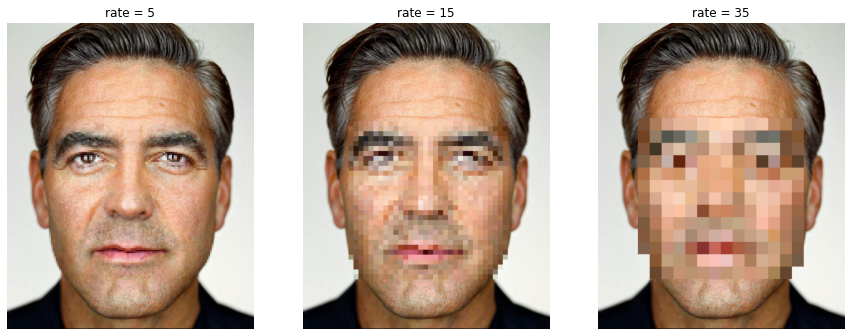

In [4]:
fig, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('rate = 5')
axs[1].imshow(cv2.cvtColor(img15, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('rate = 15')
axs[2].imshow(cv2.cvtColor(img35, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('rate = 35')

plt.show()